In [159]:
%matplotlib inline

import pandas as pd
from scipy import stats 
from matplotlib import pyplot as plt

from torch_rl.stats import RLTrainingStats
df1 = RLTrainingStats.load('/disk/users/vlasteli/no_backup/Projects/torch_rl/examples/training_stats_2018-02-07 10:23:38.480124')
df2 = RLTrainingStats.load('/disk/users/vlasteli/no_backup/Projects/torch_rl/examples/training_stats_2018-02-07 11:25:22.645696')

/fzi/ids/vlasteli/no_backup/miniconda2/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=300,min_periods=1,center=False).mean()
  """
/fzi/ids/vlasteli/no_backup/miniconda2/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=200,min_periods=1,center=False).mean()
  """
/fzi/ids/vlasteli/no_backup/miniconda2/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,min_periods=1,center=False).mean()
  """
/fzi/ids/vlasteli/no_backup/miniconda2/envs/ai/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created v

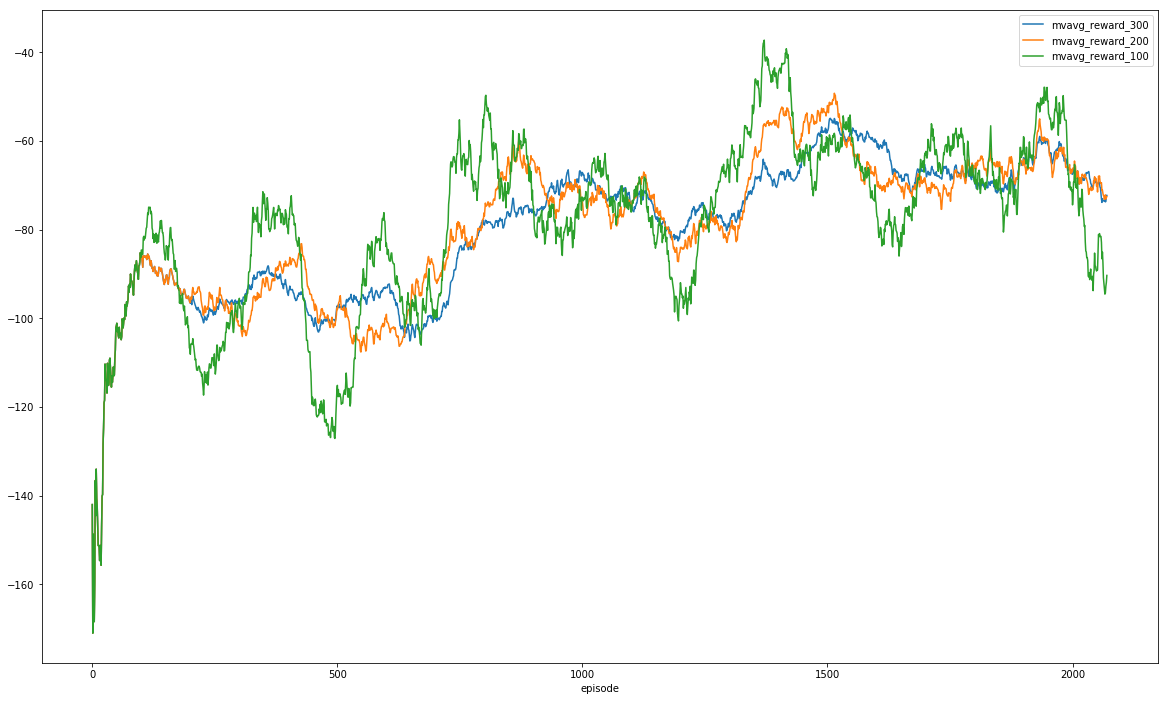

In [160]:
def calc_moving_averages(df):
    mvavg_windows = [300, 200, 100]
    keys = ["mvavg_reward_" + str(x) for x in mvavg_windows]
    for w, k in zip(mvavg_windows, keys):
        df[k] = pd.rolling_mean(df['reward'], window=w, min_periods=1)

calc_moving_averages(df1)
calc_moving_averages(df2)
df1.plot(y=keys, figsize=(20,12))



MWW RankSum P = 2.915488080205823e-189  < 0.05?
T-test P = 4.826864325226724e-217  < 0.1?


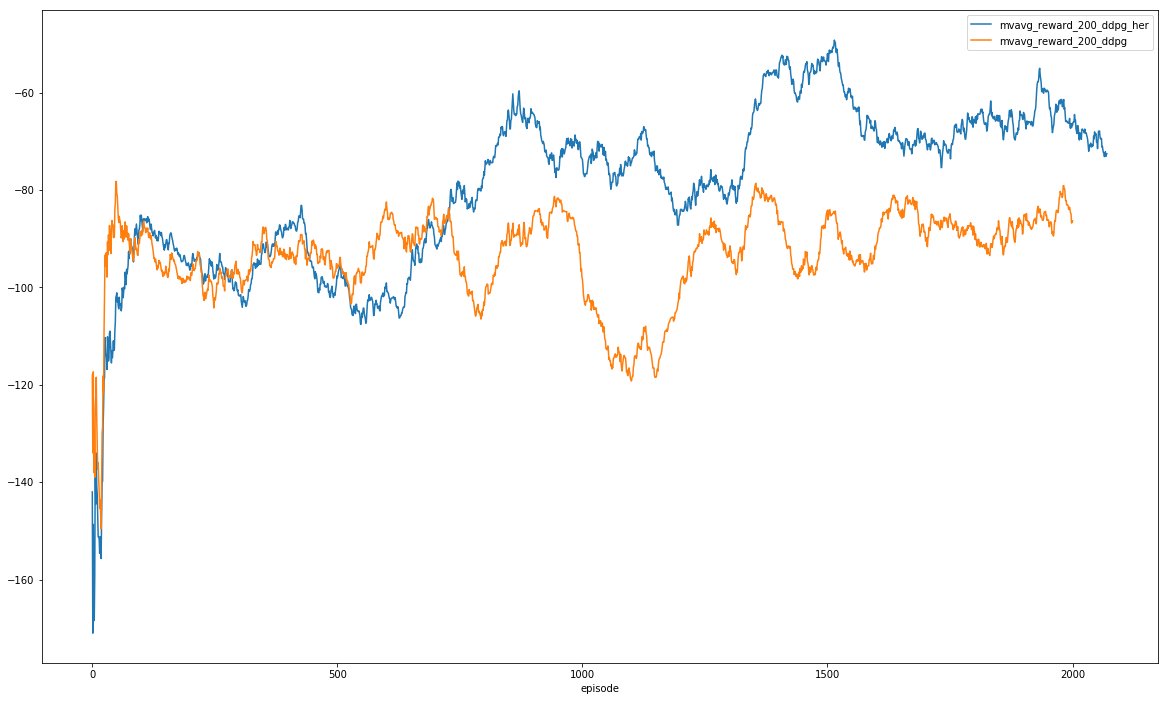

In [161]:
df_join = df1.join(df2, lsuffix="_ddpg_her", rsuffix="_ddpg", )

z_stat, p_val = stats.ranksums(df1['mvavg_reward_200'], df2['mvavg_reward_200'])  
print("MWW RankSum P =", p_val, " < 0.05?")  
z_stat, p_val = stats.ttest_ind(df1['mvavg_reward_200'], df2['mvavg_reward_200'])  
print("T-test P =", p_val, " < 0.1?")  

df_join.filter(regex="mvavg_reward_200*").plot(figsize=(20,12))

#  Mann-Whitney-Wilcoxon (MWW) RankSum test

The MWW RankSum test is a useful test to determine if two distributions are significantly different or not. Unlike the t-test, the RankSum test does not assume that the data are normally distributed, potentially providing a more accurate assessment of the data sets.

If P < 0.05 the distributions significantly differ.

In [8]:
z_stat, p_val = stats.ranksums(df1['mvavg_reward'], df2['mvavg_reward'])  
  
print("MWW RankSum P =", p_val)  

MWW RankSum P for treatments 1 and 2 = 0.0032747983550358733


# T-test

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores.

In [9]:
z_stat, p_val = stats.ttest_ind(df1['mvavg_reward'], df2['mvavg_reward'])  
  
print("T-test P =", p_val)  

T-test P = 0.010933181180549435
